**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read Data**

In [2]:
orders=pd.read_excel('/content/Orders.xlsx')
orders.head(5)

,Row ID,Customer ID,Product ID,Order ID,Order Date,Ship Date,Ship Mode,Market,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,AB-100151402,TEC-PH-5816,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,USCA,221.980,2,0.0,62.1544,40.77,High
1,26341,JR-162107,FUR-CH-5379,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Asia Pacific,3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,CR-127307,TEC-PH-5356,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,Asia Pacific,5175.171,9,0.1,919.9710,915.49,Medium
3,13524,KM-1637548,TEC-PH-5267,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,Europe,2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,RH-9495111,TEC-CO-6011,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,Africa,2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Customer ID     51290 non-null  object        
 2   Product ID      51290 non-null  object        
 3   Order ID        51290 non-null  object        
 4   Order Date      51290 non-null  datetime64[ns]
 5   Ship Date       51290 non-null  datetime64[ns]
 6   Ship Mode       51290 non-null  object        
 7   Market          51290 non-null  object        
 8   Sales           51290 non-null  float64       
 9   Quantity        51290 non-null  int64         
 10  Discount        51290 non-null  float64       
 11  Profit          51290 non-null  float64       
 12  Shipping Cost   51290 non-null  float64       
 13  Order Priority  51290 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(6)


In [ ]:
orders.shape

(51290, 14)

In [12]:
order_describe=orders.drop(columns=['Row ID', 'Order Date', 'Ship Date'])

In [13]:
#For vieweing only numerical Data
order_describe.describe().T

#remove row id , order date , ship date

,count,mean,std,min,25%,50%,75%,max
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.478567,57.251373,1.002,2.610000,7.790,24.4500,933.570


In [14]:
orders.isnull().sum()

,0
Row ID,0
Customer ID,0
Product ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Market,0
Sales,0
Quantity,0


In [15]:
orders.duplicated().sum()

0

In [ ]:
orders.to_excel("orders.xlsx", index = False)

**Orders dataset is ready and serves as a fact sheet**

In [ ]:
##Read customers Dataset

In [3]:
customers=pd.read_excel('/content/Customers (1).xlsx')
customers.head(5)

,Customer ID,Customer Name,Segment,City,State,Country,Region
0,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US
1,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania
2,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania
3,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe
4,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24956 entries, 0 to 24955
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer ID    24956 non-null  object
 1   Customer Name  24956 non-null  object
 2   Segment        24956 non-null  object
 3   City           24956 non-null  object
 4   State          24956 non-null  object
 5   Country        24956 non-null  object
 6   Region         24956 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


In [ ]:
customers.shape

In [ ]:
customers.isnull().sum()

In [ ]:
customers.duplicated().sum()

In [ ]:
customers=customers.drop(columns=['Postal Code'])
#Due to huge number of nulls and city,state,country and region columns are already for showing the exact geographical location

In [ ]:
duplicate_rows = customers[customers.duplicated(keep=False)]
print(duplicate_rows)

In [ ]:
customers = customers.drop_duplicates()

In [ ]:
customers.duplicated().sum()

In [16]:
#To make sure that customer id is unique
customers['Customer ID'].unique()

array(['AB-100151402', 'JR-162107', 'CR-127307', ..., 'ZD-219251402',
       'AS-285147', 'MC-1810093'], dtype=object)

In [ ]:
customers.to_excel("Customers.xlsx", index = False)

**Cutomers Dataset is Ready and serves as a dim sheet**

In [ ]:
##Read Products Dataset

In [5]:
products=pd.read_excel('/content/products (1).xlsx')
products.head(5)

,Product ID,Category,Sub-Category,Product Name
0,TEC-PH-5816,Technology,Phones,Samsung Convoy 3
1,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black"
2,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID"
3,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless"
4,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed"


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3788 entries, 0 to 3787
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product ID    3788 non-null   object
 1   Category      3788 non-null   object
 2   Sub-Category  3788 non-null   object
 3   Product Name  3788 non-null   object
dtypes: object(4)
memory usage: 118.5+ KB


In [18]:
products.shape

(3788, 4)

In [19]:
products.isnull().sum()

,0
Product ID,0
Category,0
Sub-Category,0
Product Name,0


In [ ]:
products.duplicated().sum()

In [ ]:
products = products.drop_duplicates()

In [ ]:
products.duplicated().sum()

**Products dataset is ready and serves as a dim sheet**

In [ ]:
products.to_excel("products.xlsx", index = False)

In [ ]:
##Read Returns Dataset

In [6]:
returns=pd.read_excel('/content/Returns.xlsx')
returns.head(5)

,Returned,Order ID,Region
0,Yes,ES-2015-RA1994545-42218,Western Europe
1,Yes,ES-2012-SC208458-41070,Western Europe
2,Yes,ES-2015-CC1210045-42182,Western Europe
3,Yes,ES-2015-MM1792045-42199,Western Europe
4,Yes,ES-2015-BB1154548-42336,Western Europe


In [ ]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  1079 non-null   object
 1   Order ID  1079 non-null   object
 2   Region    1079 non-null   object
dtypes: object(3)
memory usage: 25.4+ KB


In [20]:
returns.shape

(1079, 3)

In [ ]:
returns.isnull().sum()

In [ ]:
returns.duplicated().sum()

In [ ]:
returns.to_excel("returns.xlsx", index = False)

In [ ]:
##Datasets are ready

In [7]:

merged_df = pd.merge(orders, customers, on='Customer ID', how='left')
merged_df = pd.merge(merged_df, products, on='Product ID', how='left')
merged_df = pd.merge(merged_df, returns, on='Order ID', how='left')
merged_df.head()


,Row ID,Customer ID,Product ID,Order ID,Order Date,Ship Date,Ship Mode,Market,Sales,Quantity,...,Segment,City,State,Country,Region_x,Category,Sub-Category,Product Name,Returned,Region_y
0,40098,AB-100151402,TEC-PH-5816,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,USCA,221.980,2,...,Consumer,Oklahoma City,Oklahoma,United States,Central US,Technology,Phones,Samsung Convoy 3,NaN,NaN
1,40098,AB-100151402,TEC-PH-5816,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,USCA,221.980,2,...,Consumer,Arlington,Texas,United States,Central US,Technology,Phones,Samsung Convoy 3,NaN,NaN
2,26341,JR-162107,FUR-CH-5379,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Asia Pacific,3709.395,9,...,Corporate,Wollongong,New South Wales,Australia,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",NaN,NaN
3,26341,JR-162107,FUR-CH-5379,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Asia Pacific,3709.395,9,...,Corporate,Perth,Western Australia,Australia,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",NaN,NaN
4,26341,JR-162107,FUR-CH-5379,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Asia Pacific,3709.395,9,...,Corporate,Caloundra,Queensland,Australia,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",NaN,NaN


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96033 entries, 0 to 96032
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          96033 non-null  int64         
 1   Customer ID     96033 non-null  object        
 2   Product ID      96033 non-null  object        
 3   Order ID        96033 non-null  object        
 4   Order Date      96033 non-null  datetime64[ns]
 5   Ship Date       96033 non-null  datetime64[ns]
 6   Ship Mode       96033 non-null  object        
 7   Market          96033 non-null  object        
 8   Sales           96033 non-null  float64       
 9   Quantity        96033 non-null  int64         
 10  Discount        96033 non-null  float64       
 11  Profit          96033 non-null  float64       
 12  Shipping Cost   96033 non-null  float64       
 13  Order Priority  96033 non-null  object        
 14  Customer Name   96033 non-null  object        
 15  Se

**EDA**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Ship Mode', ylabel='Sales'>

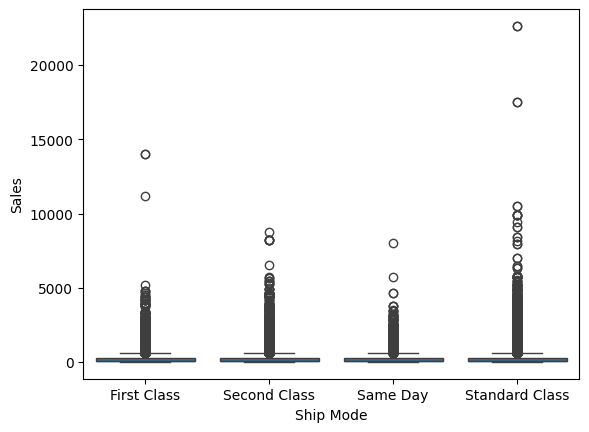

In [ ]:
##Distribution of sales for different ship mode categories.
sns.boxplot(data=merged_df,x='Ship Mode' , y='Sales')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Segment', ylabel='Sales'>

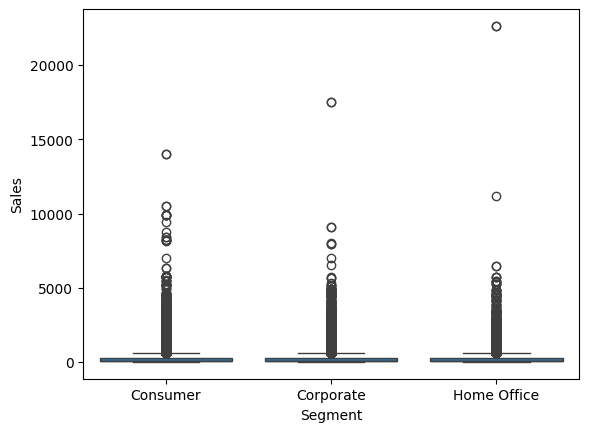

In [ ]:
##Distribution of sales for each Segment.
sns.boxplot(data=merged_df,x='Segment' , y='Sales')

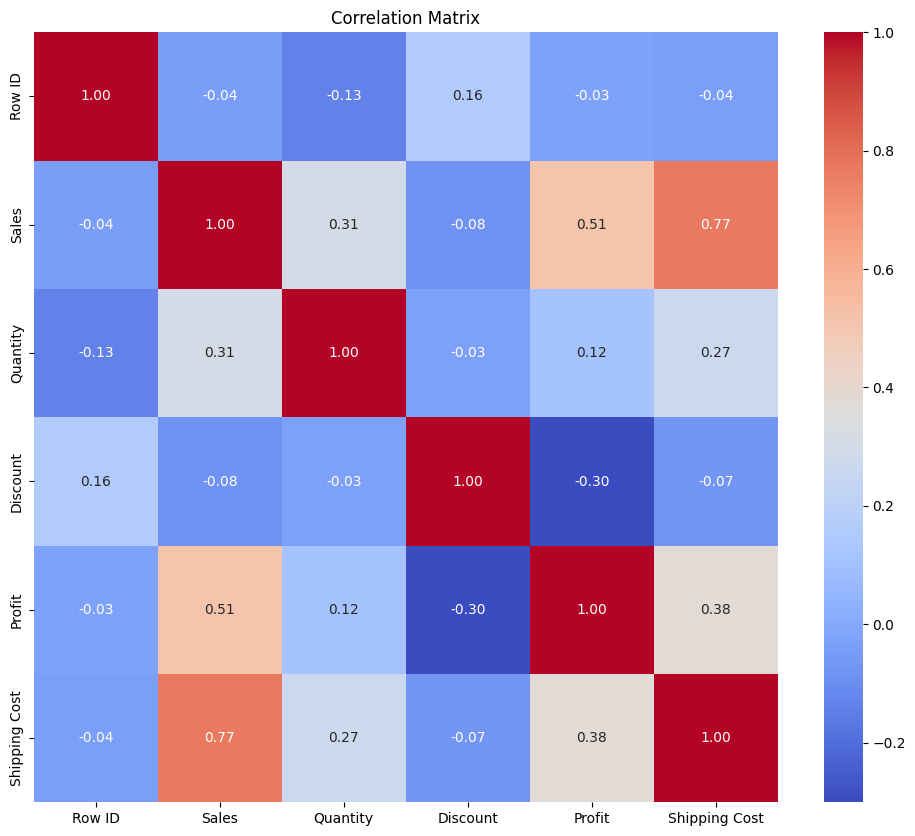

In [ ]:
# Calculate the correlation matrix considering only numerical features
correlation_matrix = merged_df.select_dtypes(include=np.number).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#As the number is close to 1 strong relation , 0 no relation , close to -1 opposite relation

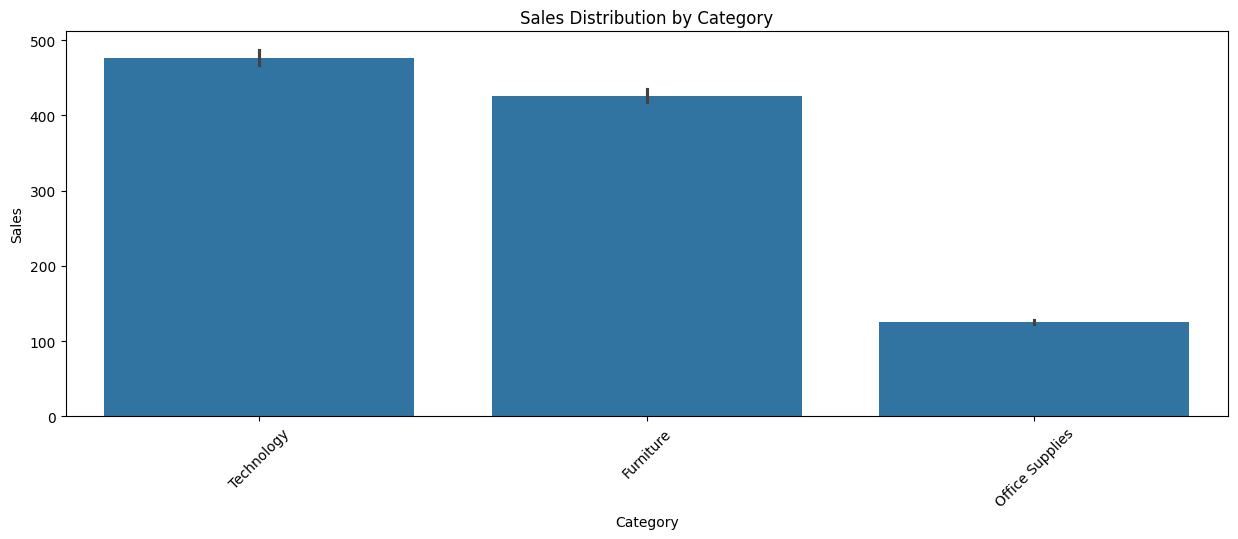

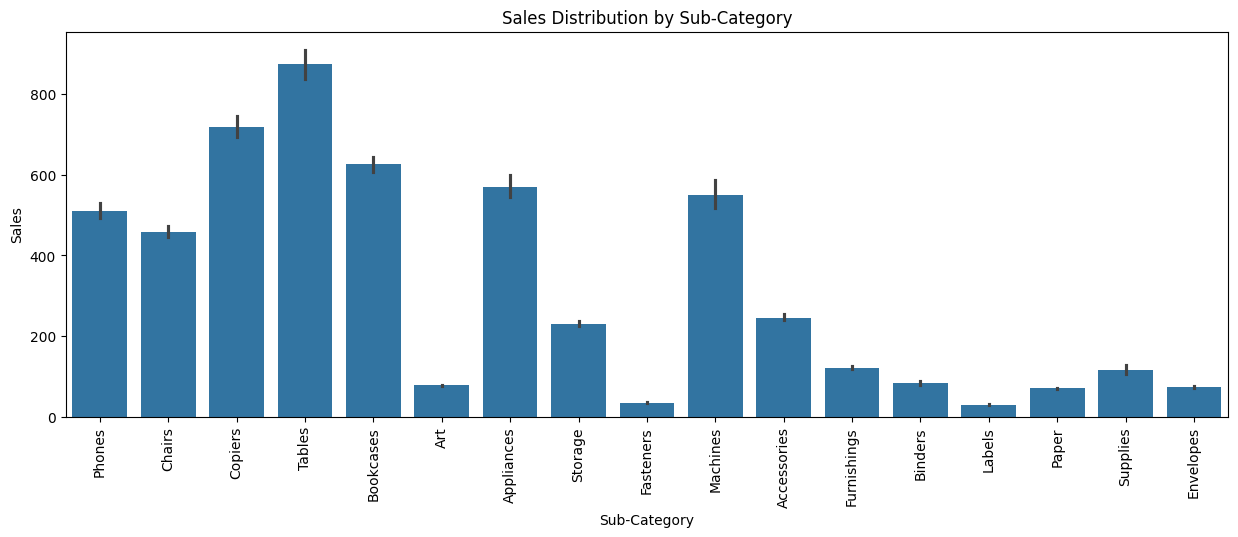

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Category', y='Sales', data=merged_df)
plt.title('Sales Distribution by Category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 5))
sns.barplot(x='Sub-Category', y='Sales', data=merged_df)
plt.title('Sales Distribution by Sub-Category')
plt.xticks(rotation=90)
plt.show()

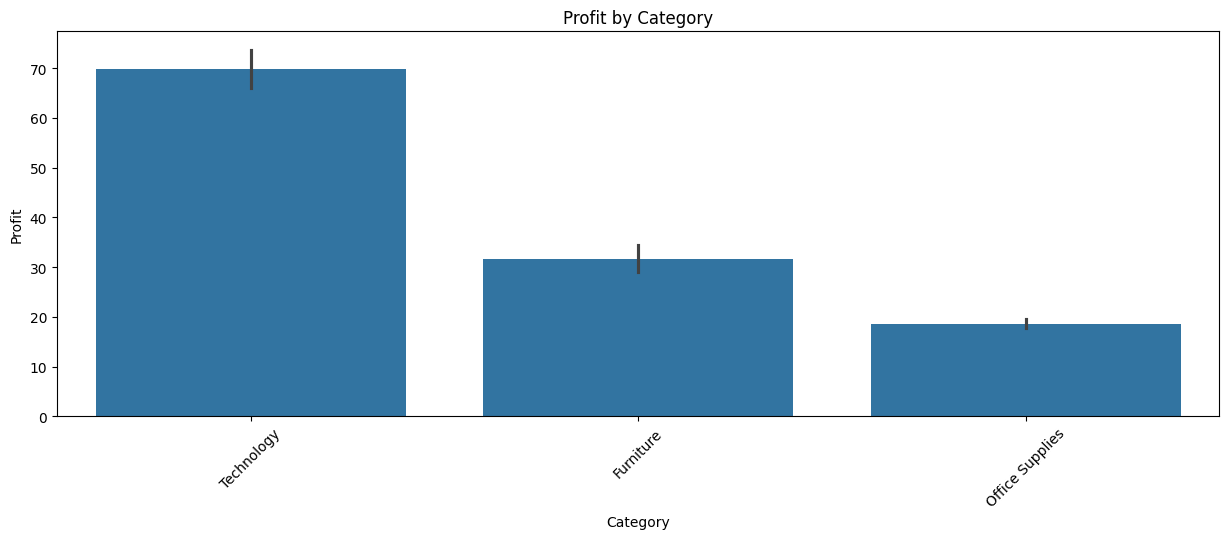

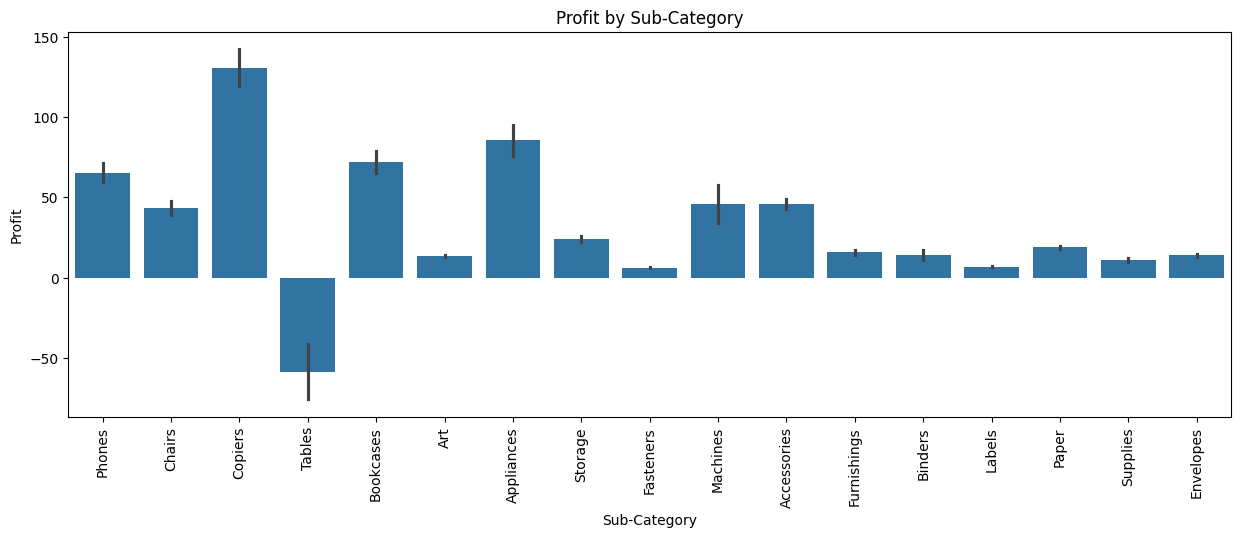

In [9]:
# Profit by Category and Sub-Category
plt.figure(figsize=(15, 5))
sns.barplot(x='Category', y='Profit', data=merged_df)
plt.title('Profit by Category')
plt.xticks(rotation=45)
plt.show()



<ipython-input-8-25cc827b2158>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_profit_margin = merged_df.groupby('Category').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).reset_index(name='Profit Margin')


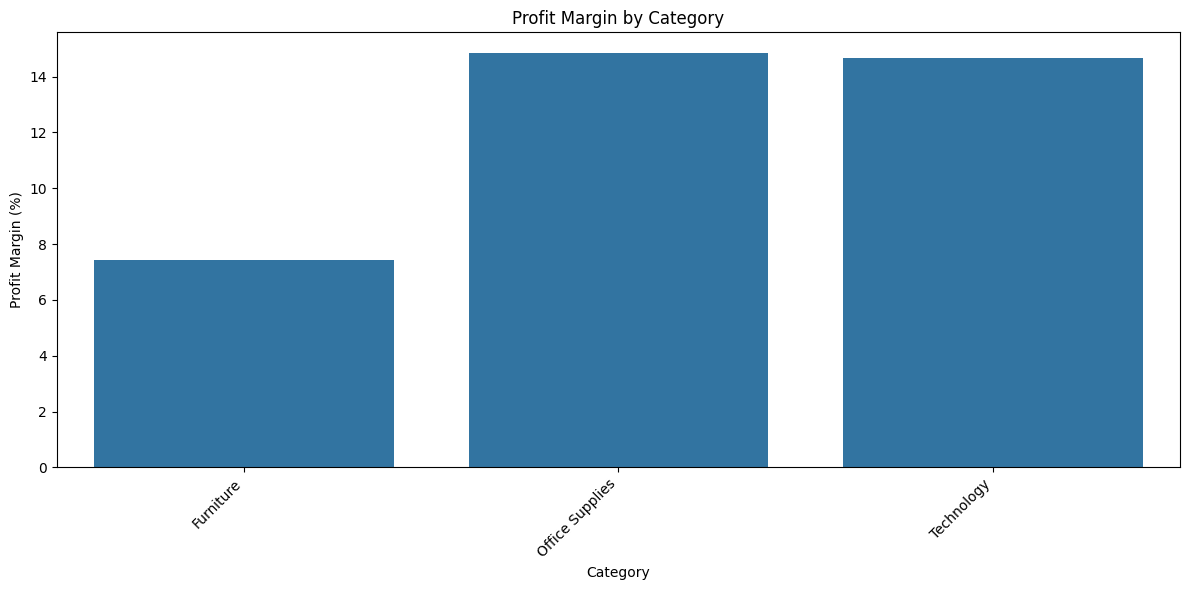

In [8]:
# Calculate Profit Margin for each category
category_profit_margin = merged_df.groupby('Category').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).reset_index(name='Profit Margin')

# Plotting the Profit Margin for each category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit Margin', data=category_profit_margin)
plt.title('Profit Margin by Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel('Profit Margin (%)')
plt.tight_layout()
plt.show()

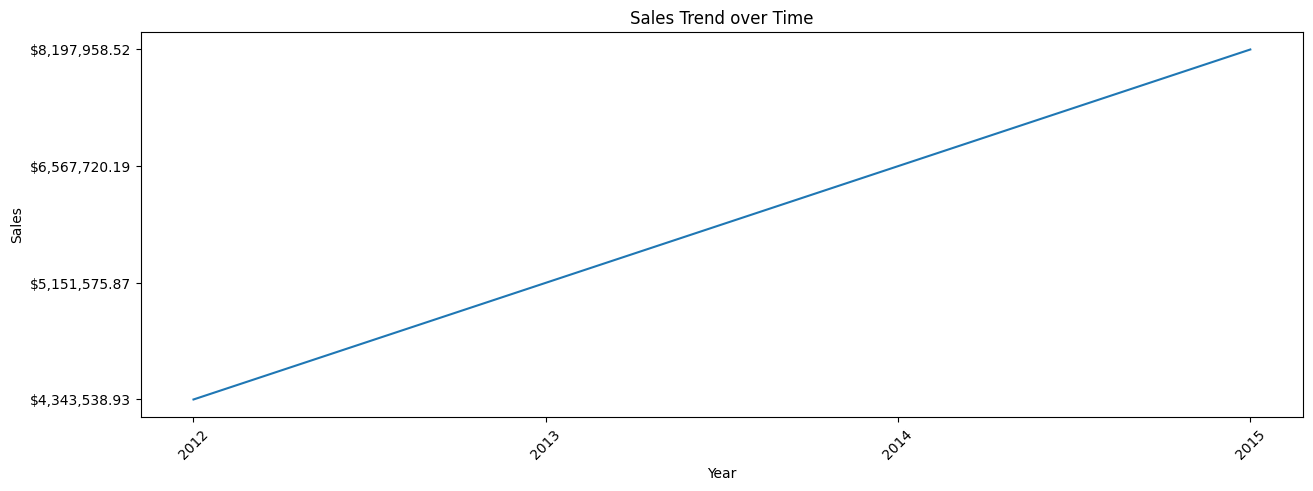

In [28]:
# Group by year and sum sales
yearly_sales = merged_df.groupby(merged_df['Order Date'].dt.to_period('Y'))['Sales'].sum().reset_index()

# Format sales values with dollar sign
yearly_sales['Sales'] = yearly_sales['Sales'].apply(lambda x: '${:,.2f}'.format(x))

# Plot the sales trend
plt.figure(figsize=(15, 5))
plt.plot(yearly_sales['Order Date'].astype(str), yearly_sales['Sales'])
plt.title('Sales Trend over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.show()

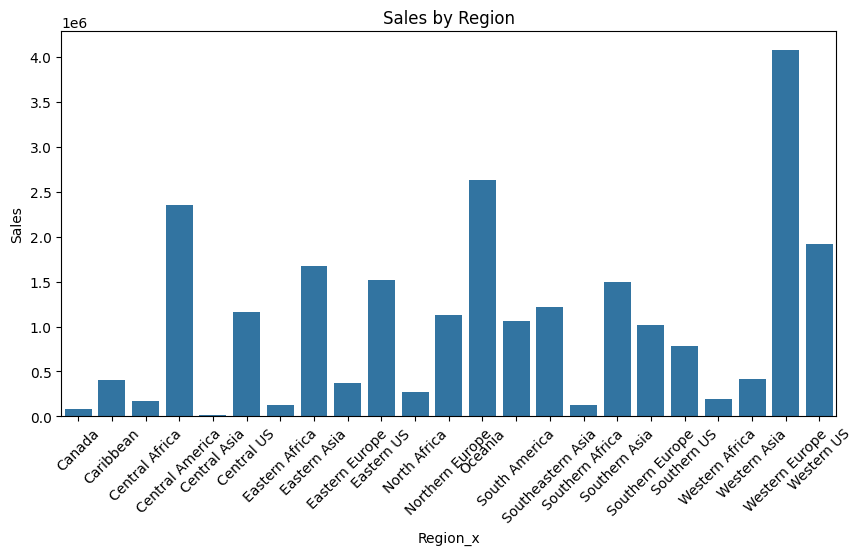

In [ ]:
# Group by region and sum sales
region_sales = merged_df.groupby('Region_x')['Sales'].sum().reset_index()

''''
Region_x because it's the column in the orders dataset and doesn't
that of returned dataset
'''''
# Plot the sales by region
plt.figure(figsize=(10, 5))
sns.barplot(x='Region_x', y='Sales', data=region_sales)
plt.title('Sales by Region')
plt.xticks(rotation=45)
plt.show()

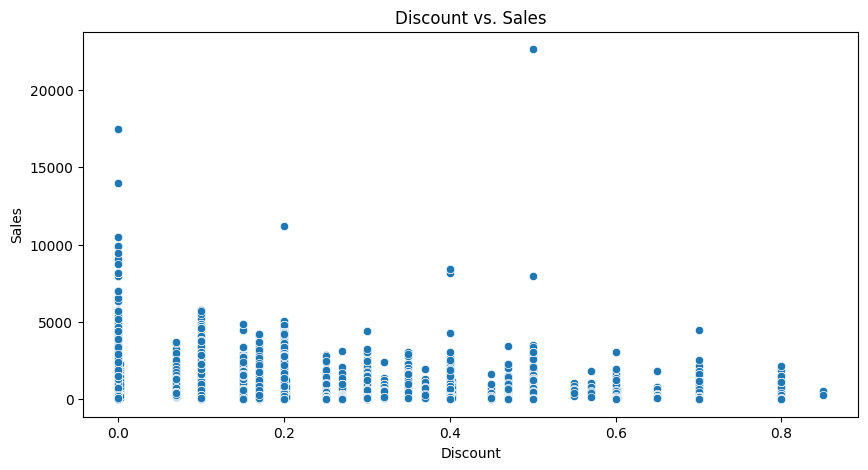

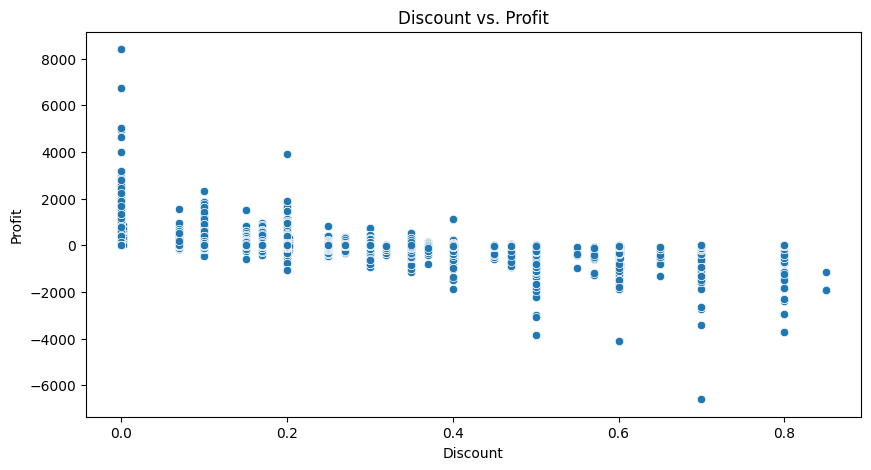

In [11]:
# Discount vs. Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Discount', y='Sales', data=merged_df)
plt.title('Discount vs. Sales')
plt.show()

# Discount vs. Profit
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Discount', y='Profit', data=merged_df)
plt.title('Discount vs. Profit')
plt.show()

In [29]:
# Top Customers by Sales
top_customers = merged_df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_customers)

Customer Name
Adrian Barton      93088.53000
Seth Vernon        79880.17048
Laurel Beltran     75109.40162
Fred Hopkins       74359.35002
Greg Tran          74125.70560
Ken Lonsdale       73918.32050
Laura Armstrong    73799.61790
Bart Watters       72966.96950
Tom Ashbrook       72864.68440
Eric Murdock       72845.88852
Name: Sales, dtype: float64


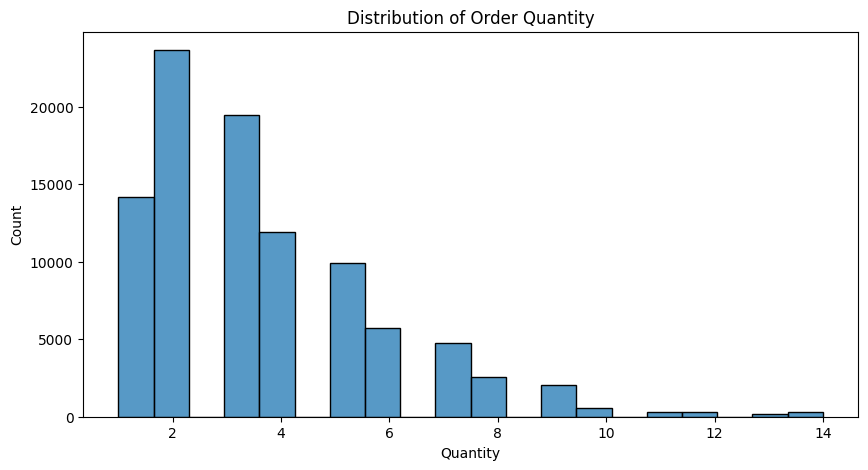

In [ ]:
# Distribution of Order Quantity
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['Quantity'], bins=20)
plt.title('Distribution of Order Quantity')
plt.xlabel('Quantity')
plt.show()